In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings

In [42]:
from google.colab import files
data = pd.read_csv("Google_Stock_Train (2010-2022).csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


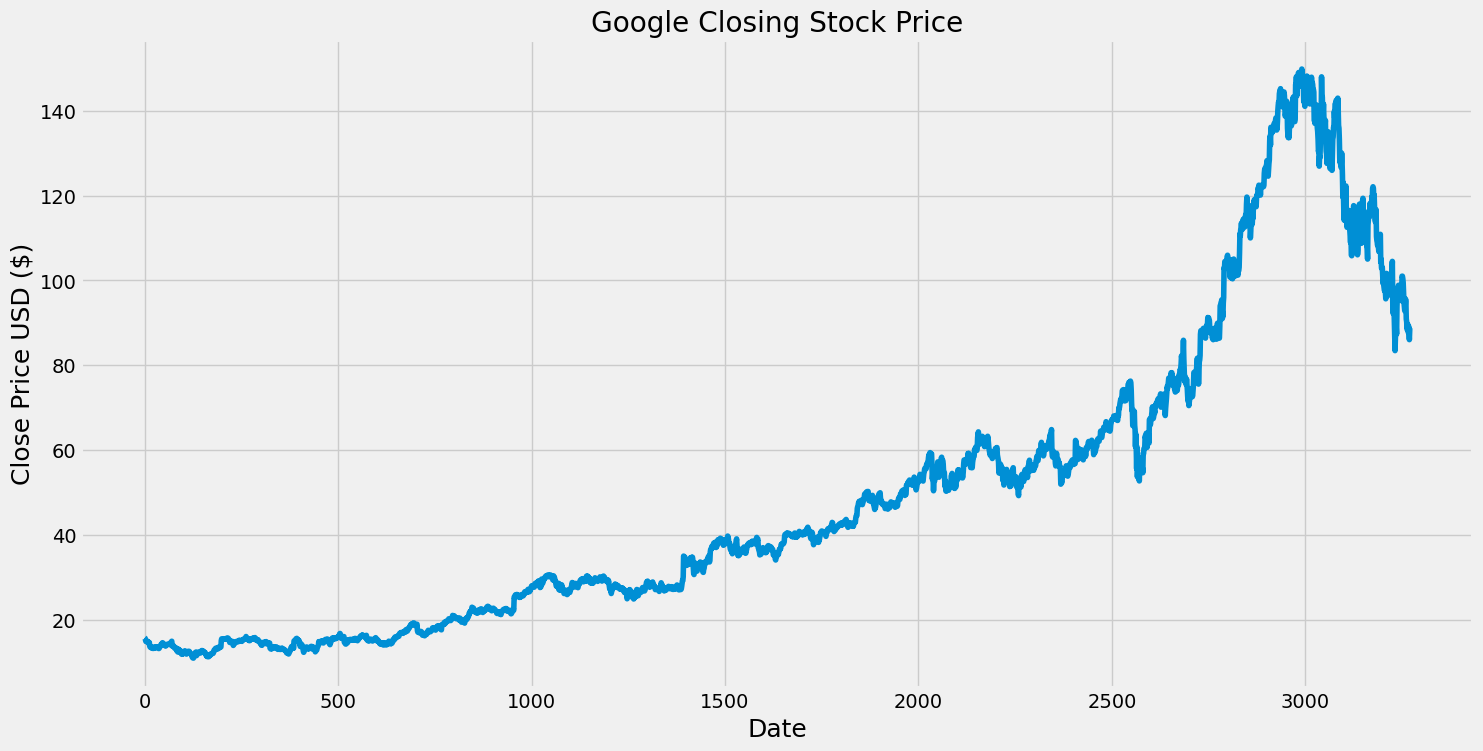

In [43]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [44]:
data = data[["Date","Close"]]
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2010-01-04,15.684434
1,2010-01-05,15.615365
2,2010-01-06,15.221722
3,2010-01-07,14.867367
4,2010-01-08,15.065566


In [45]:
from prophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjptz0rd/udktwnlv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgjptz0rd/9q7wlo91.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74543', 'data', 'file=/tmp/tmpgjptz0rd/udktwnlv.json', 'init=/tmp/tmpgjptz0rd/9q7wlo91.json', 'output', 'file=/tmp/tmpgjptz0rd/prophet_modelzxrqdh8a/prophet_model-20250318082516.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:25:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:25:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


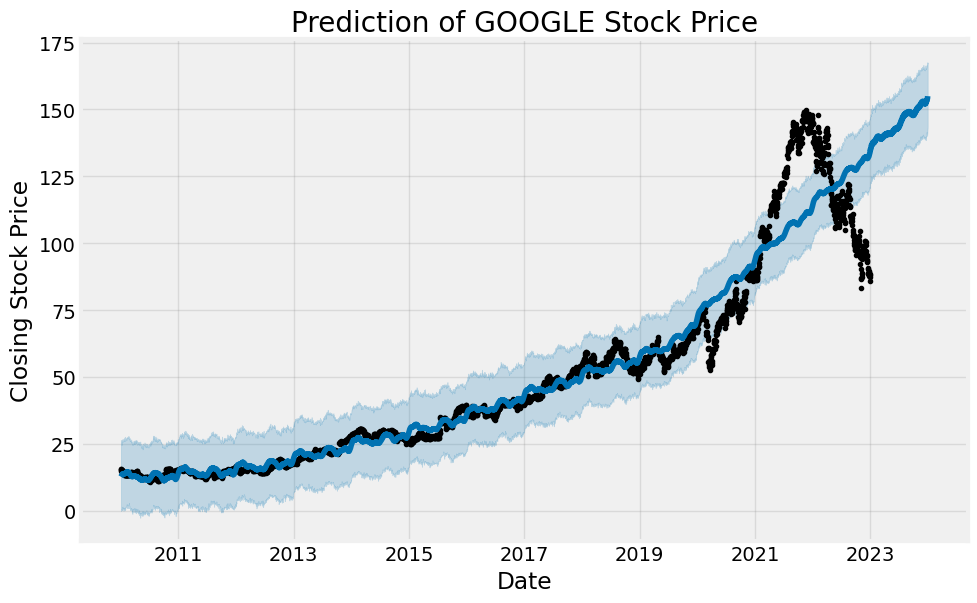

In [49]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

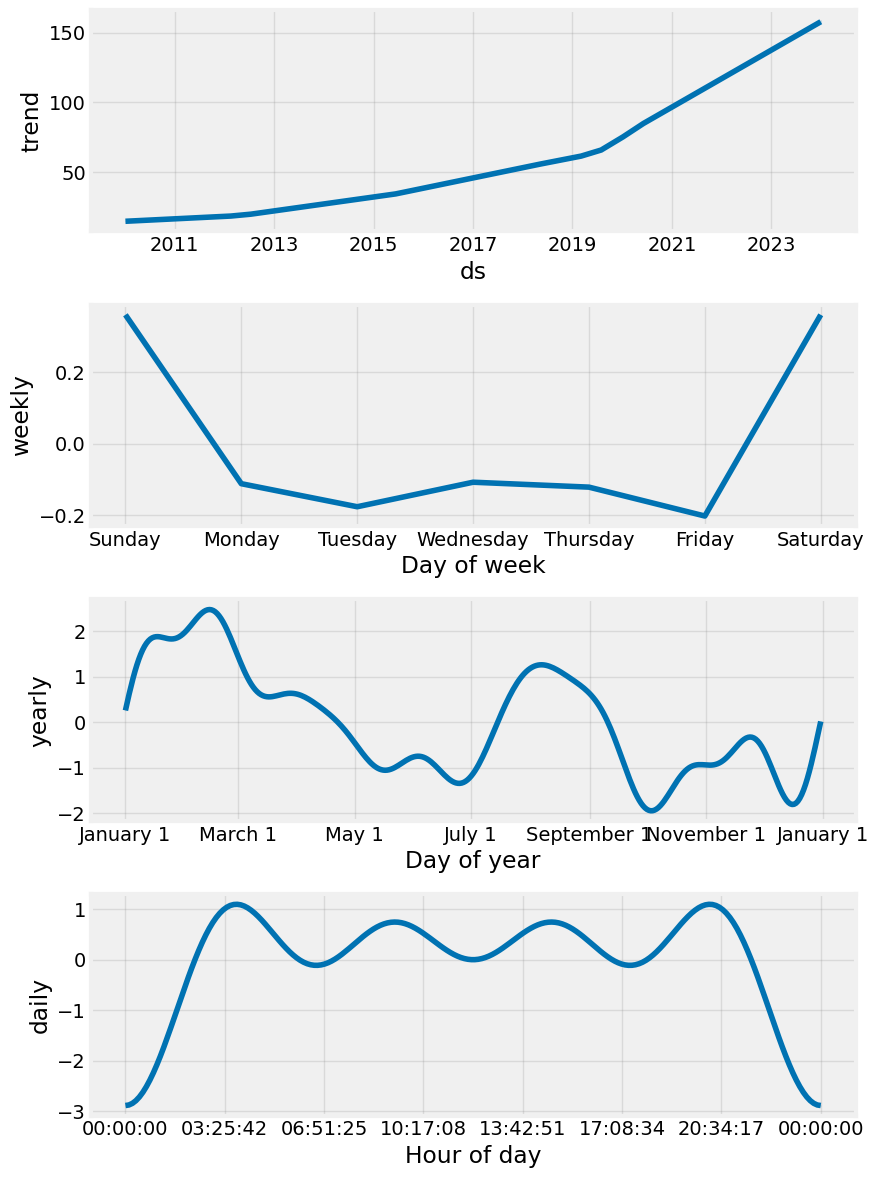

In [47]:
m.plot_components(predictions)
plt.show()